Epoch 1/2
96/96 [==============================] - 3s 18ms/step - loss: 0.5679 - auc_27: 0.7621 - recall_at_10: 0.9211 - ndcg_at_10: 0.9158 - regularization_loss: 0.0000e+00 - loss_batch: 0.5677 - val_loss: 0.5505 - val_auc_27: 0.7820 - val_recall_at_10: 0.9958 - val_ndcg_at_10: 0.9969 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 0.5539
Epoch 2/2
24/24 [==============================] - 0s 1ms/step - loss: 0.8351 - auc_27: 0.7405 - recall_at_10: 0.9713 - ndcg_at_10: 0.9760 - regularization_loss: 0.0000e+00 - loss_batch: 0.8348
{'loss': 0.835131824016571, 'auc_27': 0.7404848337173462, 'recall_at_10': 0.9666666388511658, 'ndcg_at_10': 0.9698586463928223, 'regularization_loss': 0.0, 'loss_batch': 0.8264475464820862}
24/24 [==============================] - 0s 2ms/step - loss: 0.5455 - auc_28: 0.7918 - recall_at_10: 0.9989 - ndcg_at_10: 0.9990 - regularization_loss: 0.0000e+00 - loss_batch: 0.5452
{'loss': 0.5455216765403748, 'auc_28': 0.7917587757110596, 'recall_at_10': 0.99583

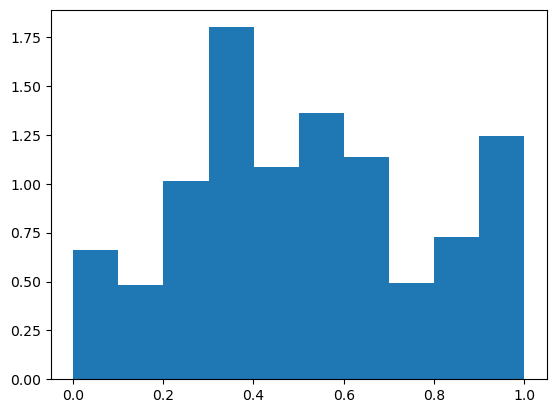

In [215]:
from merlin_model_recsys_funcs import *

import warnings
warnings.filterwarnings("ignore")
train, valid, output = preprocessing()
pred = ncf_model(train, valid, lr = .0175,  epoch = 2)
pred2 = dlrm(train, valid)
plt.hist(pred2, density = True)
plt.show()

In [216]:
s = valid.head(-1)
s['predicted_values'] = pred2[:-1]

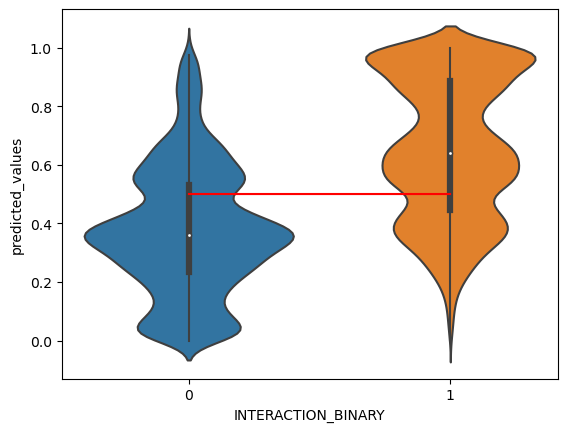

In [217]:
import seaborn as sns

sns.violinplot(data = s, x = 'INTERACTION_BINARY', y = 'predicted_values')
sns.lineplot(data = s, x = 'INTERACTION_BINARY', y = .5, color = 'r')

plt.show()

In [188]:
import sklearn

false_pos, true_pos, _ = sklearn.metrics.roc_curve(s['INTERACTION_BINARY'], s['predicted_values'])

<Axes: >

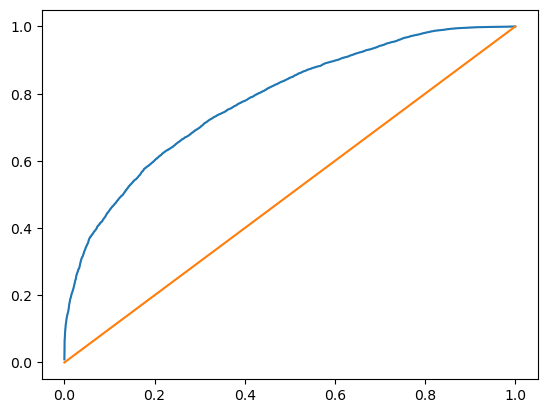

In [190]:
sns.lineplot(x = false_pos, y = true_pos)
sns.lineplot(x = false_pos, y = false_pos)

In [161]:
from merlin.models.utils.dataset import unique_rows_by_features

candidate_features = unique_rows_by_features(train, Tags.ITEM, Tags.ITEM_ID)
candidate_features.head()

,ITEM_ID,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
0,13,-0.717022,-0.655776,-0.815655,-0.603257,0.399469,-0.799885,-0.649354
1,47,-0.717022,-0.655776,-0.815655,-0.603257,0.399469,-0.799885,-0.649354
2,3,-0.790835,-0.766427,-0.897754,-0.603257,-0.943711,-0.507102,-0.649354
3,6,-0.790835,-0.766427,-0.733555,-0.603257,-0.943711,-0.507102,-0.649354
4,51,0.242544,0.229430,0.333738,-0.603257,-0.943711,0.664029,-0.649354


In [214]:
embeddings = model.aid_factors.weight.detach().numpy()

AttributeError: 'Model' object has no attribute 'aid_factors'

In [209]:
eval_loader = mm.Loader(valid, batch_size=8, shuffle=False)
batch = next(iter(eval_loader))

In [213]:
eval_loader

In [153]:
from merlin.systems.dag.ops.tensorflow import PredictTensorflow
from merlin.systems.dag.ops.workflow import TransformWorkflow

nvt_wkflow = nvt.Workflow(output)

workflow =  nvt.Workflow(["ITEM_ID"] + (['ITEM_ID', 'STYLE', 'TAXONOMY_STYLE', 'COLOR_NAME', 'PRODUCT_SUBCLASS', 'TEAM', 'FRANCHISE', 'PRODUCT_GROUP'] >> TransformWorkflow(nvt_wkflow.get_subworkflow("item")) >> PredictTensorflow(model.first.item_block())))
item_embeddings = workflow.fit_transform(Dataset(item_features)).to_ddf().compute()

ValueError: No subgraph named item. Options are: dict_keys([])

In [202]:
import pandas as pd
cwd = os.getcwd()
pd.read_parquet('integration/train/part_0.parquet', engine='pyarrow')

,USER_ID,ITEM_ID,CLICKSTREAM_EVENTS_TOTAL,COUNTRY,DERIVED_GENDER_BY_NAME,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP,INTERACTION_BINARY,INTERACTIONDECAY
0,38911,13,-0.525543,-0.058881,1.203504,-0.717022,-0.655776,-0.815655,-0.603257,0.399469,-0.799885,-0.649354,0,0.521172
1,6259,47,-0.650675,-0.058881,-0.830899,-0.717022,-0.655776,-0.815655,-0.603257,0.399469,-0.799885,-0.649354,1,-0.401120
2,36122,3,-0.360438,-0.058881,1.203504,-0.790835,-0.766427,-0.897754,-0.603257,-0.943711,-0.507102,-0.649354,1,0.512083
3,21403,6,-0.777545,-0.058881,-0.830899,-0.790835,-0.766427,-0.733555,-0.603257,-0.943711,-0.507102,-0.649354,1,-0.401120
4,1945,51,3.094596,-0.058881,-0.830899,0.242544,0.229430,0.333738,-0.603257,-0.943711,0.664029,-0.649354,0,-0.096719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97979,18016,108,-0.362176,-0.058881,1.203504,-0.347958,-0.434475,1.359982,-0.603257,0.399469,-0.214319,2.085319,0,-0.295336
97980,22362,121,1.992739,-0.058881,-0.830899,2.087863,1.225287,1.195783,-0.005182,-0.943711,1.249595,-0.649354,0,-0.347334
97981,1648,25,-0.516853,-0.058881,-0.830899,-0.790835,-0.766427,0.169539,-0.005182,-0.943711,-0.507102,-0.649354,1,-0.302697
97982,48,153,1.281920,-0.058881,-0.830899,3.121242,3.548954,-0.487257,2.387119,-0.943711,1.835160,0.717983,1,-0.049904
